# ***EAS_846_Overview***


# Detail Tab_846:


>
# 1.  📊 846 Compliance Analysis Dashboard (Location-Level)
# 2.   Top 10 suppliers who are not in complaince





In [22]:
from google.colab import files
import pandas as pd

# 📤 Upload your Excel file
uploaded = files.upload()

# Once uploaded, check the file name
# Suppose your file name is '846_data.xlsx'
file_path = 'Details.xlsx'

# Read Excel file
df = pd.read_excel(file_path)

print("✅ File loaded successfully. Preview:")
print(df.head())


TypeError: 'NoneType' object is not subscriptable

# 🥇 STEP 1 — Load Data
# 🥈 STEP 2 — Parse Dates
# 🥉 STEP 3 — Determine Supplier Groups


**Compare which suppliers:**

1.   Sent 846 data this year
2.   Sent data last year

# 🏅 STEP 4 — Classify Compliance

**Status	Meaning**
✅ **Compliant	Sent 846 data this year**

🟠 **Stopped Sending	Sent last year but not this year**

🔴 **No 846 Date	No data received**

⚪ **Prior Year Only	Data only available from last year**

⚫ **Other	Data doesn’t fit above conditions**

🧮 **STEP 5 — Summarize Compliance**

# 🥧 STEP 6 — Visualize Overall Compliance (Interactive Pie Chart)

**Green → Compliant**

**Orange → Stopped Sending**

**Red → No 846**

**Grey → Prior Year**

# 🏭 STEP 7 — Supplier / Location / Category Non-Compliance

Identify non-compliant records and summarize by Supplier Name, Location, and Item Category to pinpoint recurring problem areas.

# 📉 STEP 8 — Top Non-Compliant Suppliers (Bar Chart)

🔹 **Bar chart highlights which suppliers consistently fail to send 846 data.**

💾 STEP 9 — Export Final Report

# 🧾 Final Deliverables

Interactive compliance summary pie chart

Top supplier non-compliance bar chart

Downloadable Excel report with detailed insights

Year-over-year supplier activity tracking

,Compliance_Status,Count,Percentage
0,Compliant,849,64.710366
1,No 846 Date,458,34.908537
2,Prior Year Only,5,0.381098


🏭 Total Non-Compliant (Supplier+Location+Category): 199


,Supplier Name,Location,Item Category,Non_Compliance_Count
179,THE COCA-COLA COMPANY,19529 - COLUMBUS,BEVERAGE,20
181,THE COCA-COLA COMPANY,19555 - DALLAS,BEVERAGE,17
193,THE COCA-COLA COMPANY,32400 - ONTARIO,BEVERAGE,15
183,THE COCA-COLA COMPANY,19607 - PORTLAND,BEVERAGE,14
188,THE COCA-COLA COMPANY,20049 - ATLANTA,BEVERAGE,14
185,THE COCA-COLA COMPANY,19646 - KAPOLEI,BEVERAGE,12
177,THE COCA-COLA COMPANY,16905 - ALLENTOWN,BEVERAGE,12
145,SAPUTO CHEESE USA INC.,43218 - MODESTO,DAIRY,7
164,TAYLOR FARMS PLANT,26770 - SALINAS,PRODUCE,7
71,"HPC FOODS, LTD.",47493 - HONOLULU,PRODUCE,6


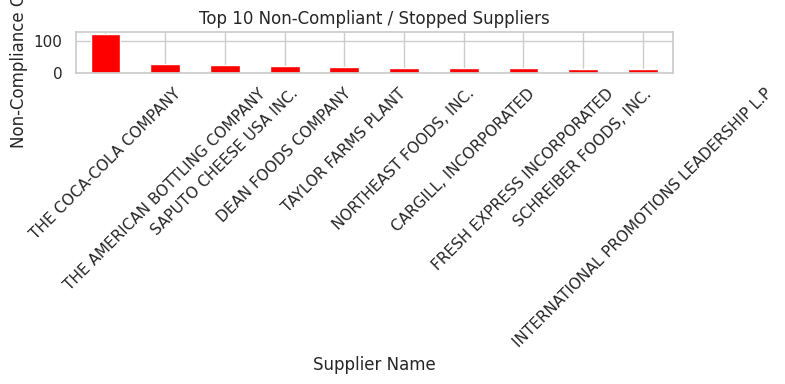


✅ Report saved to: /content/846_Compliance_Yearwise_Report.xlsx


In [44]:
# ================================================================
# 📊 846 Compliance Dashboard — Clean Final Version
# ================================================================
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime

# ------------------------------------------
# STEP 1: Load Data
# ------------------------------------------
file_path = "/content/Details.xlsx"
df = pd.read_excel(file_path)

# ------------------------------------------
# STEP 2: Parse Dates
# ------------------------------------------
df['Latest Inventory Date (846)'] = pd.to_datetime(df['Latest Inventory Date (846)'], errors='coerce')

# Extract year and month
df['Year'] = df['Latest Inventory Date (846)'].dt.year
df['Month'] = df['Latest Inventory Date (846)'].dt.month
current_year = datetime.now().year
previous_year = current_year - 1

# ------------------------------------------
# STEP 3: Determine Supplier Groups
# ------------------------------------------
# Suppliers who sent data in the current year
current_suppliers = set(df[df['Year'] == current_year]['Supplier Name'].dropna())

# Suppliers who sent data last year
previous_suppliers = set(df[df['Year'] == previous_year]['Supplier Name'].dropna())

# Suppliers who stopped sending
stopped_sending = previous_suppliers - current_suppliers

# ------------------------------------------
# STEP 4: Classify Compliance
# ------------------------------------------
def classify(row):
    if pd.isna(row['Latest Inventory Date (846)']):
        return "No 846 Date"
    elif row['Supplier Name'] in stopped_sending:
        return "Stopped Sending"
    elif row['Year'] == current_year:
        return "Compliant"
    elif row['Year'] == previous_year:
        return "Prior Year Only"
    else:
        return "Other"

df['Compliance_Status'] = df.apply(classify, axis=1)

# ------------------------------------------
# STEP 5: Summarize Compliance
# ------------------------------------------
summary_data = (
    df['Compliance_Status']
    .value_counts()
    .reset_index()
)
summary_data.columns = ['Compliance_Status', 'Count']

# Force numeric
summary_data['Count'] = pd.to_numeric(summary_data['Count'], errors='coerce')
summary_data['Percentage'] = (summary_data['Count'] / summary_data['Count'].sum()) * 100

display(summary_data)

# ------------------------------------------
# STEP 6: Interactive Pie Chart (Plotly)
# ------------------------------------------
fig = px.pie(
    summary_data,
    names='Compliance_Status',
    values='Count',
    color='Compliance_Status',
    color_discrete_map={
        'Compliant': '#4CAF50',
        'Stopped Sending': '#FF9800',
        'No 846 Date': '#F44336',
        'Prior Year Only': '#9E9E9E',
        'Other': '#607D8B'
    },
    title=f"Overall 846 Compliance Summary ({previous_year} → {current_year})",
    hole=0.3
)
fig.update_traces(textinfo='percent+label', pull=[0.02, 0.1, 0.05, 0, 0])
fig.show()

# ------------------------------------------
# STEP 7: Supplier/Location/Category Non-Compliance
# ------------------------------------------
non_compliant_df = df[df['Compliance_Status'].isin(['Stopped Sending', 'No 846 Date', 'Prior Year Only'])]
report = (
    non_compliant_df.groupby(['Supplier Name', 'Location', 'Item Category'])
    .size()
    .reset_index(name='Non_Compliance_Count')
    .sort_values('Non_Compliance_Count', ascending=False)
)

print(f"🏭 Total Non-Compliant (Supplier+Location+Category): {len(report)}")
display(report.head(20))

# ------------------------------------------
# STEP 8: Bar Chart - Top Non-Compliant Suppliers
# ------------------------------------------
if not report.empty:
    top_suppliers = (
        report.groupby('Supplier Name')['Non_Compliance_Count']
        .sum()
        .sort_values(ascending=False)
        .head(10)
    )
    plt.figure(figsize=(8,4))
    top_suppliers.plot(kind='bar', color='red')
    plt.title("Top 10 Non-Compliant / Stopped Suppliers")
    plt.xlabel("Supplier Name")
    plt.ylabel("Non-Compliance Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# ------------------------------------------
# STEP 9: Export to Excel
# ------------------------------------------
output_path = "/content/846_Compliance_Yearwise_Report.xlsx"
with pd.ExcelWriter(output_path) as writer:
    summary_data.to_excel(writer, sheet_name='Overall_Summary', index=False)
    report.to_excel(writer, sheet_name='Non_Compliant_Detail', index=False)

print(f"\n✅ Report saved to: {output_path}")


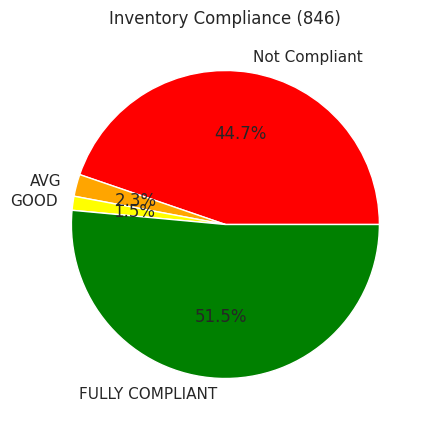

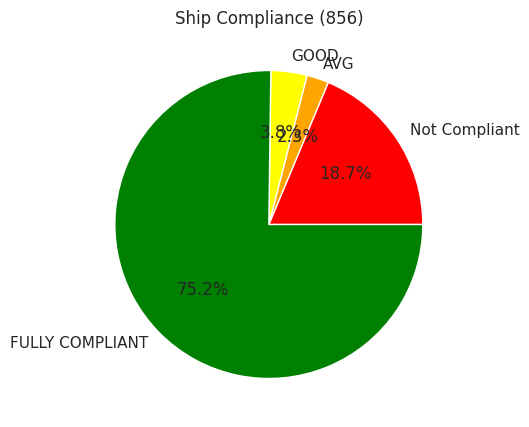

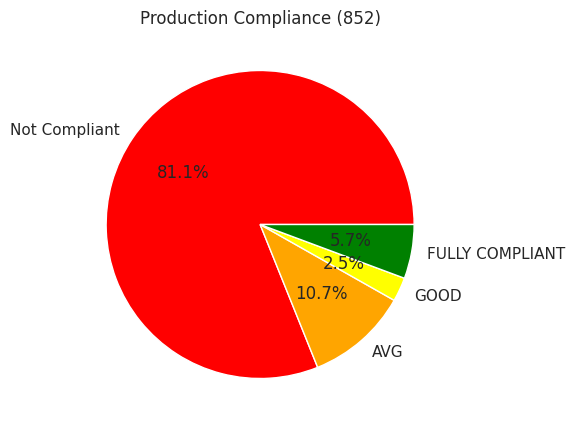

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------- Config ----------
in_path = "/content/Data Received Details.xlsx"

# ---------- Load ----------
df = pd.read_excel(in_path)
df.columns = df.columns.str.strip()

# ---------- Helper: convert various formats to numeric 0-100 ----------
def to_numeric_percent(x):
    if pd.isna(x):
        return 0.0
    s = str(x).strip()
    low = s.lower()
    if low in ('yes','y','true','t'):
        return 100.0
    if low in ('no','n','false','f'):
        return 0.0
    if '%' in s:
        try:
            return max(0.0, min(100.0, float(s.replace('%','').strip())))
        except:
            return 0.0
    try:
        v = float(s)
        if 0 <= v <= 1:
            return v * 100.0
        return max(0.0, min(100.0, v))
    except:
        pass
    try:
        pd.to_datetime(s)
        return 100.0
    except:
        return 0.0

# ---------- Columns ----------
col_846 = 'Inventory Data Received (846)'
col_856 = 'Ship Data Received (856)'
col_852_plan = 'Production Plan Data Received (852)'
col_852_act = 'Production Actual Data Received (852)'

# Convert to numeric 0-100
df['_846_num'] = df[col_846].apply(to_numeric_percent) if col_846 in df.columns else 0
df['_856_num'] = df[col_856].apply(to_numeric_percent) if col_856 in df.columns else 0
df['_852_avg'] = 0.0
if col_852_plan in df.columns and col_852_act in df.columns:
    df['_852_avg'] = ((df[col_852_plan].apply(to_numeric_percent) + df[col_852_act].apply(to_numeric_percent)) / 2.0)

# ---------- Compliance function ----------
def compliance_level(x):
    if x == 0:
        return "Not Compliant"
    elif 0 < x < 75:
        return "AVG"
    elif 75 <= x < 100:
        return "GOOD"
    elif x == 100:
        return "FULLY COMPLIANT"
    else:
        return "Unknown"

# Apply compliance levels
df['846_Compliance'] = df['_846_num'].apply(compliance_level)
df['856_Compliance'] = df['_856_num'].apply(compliance_level)
df['852_Compliance'] = df['_852_avg'].apply(compliance_level)

# ---------- Function to plot pie chart ----------
def plot_pie(series, title):
    counts = series.value_counts()
    colors = {'Not Compliant':'red','AVG':'orange','GOOD':'yellow','FULLY COMPLIANT':'green'}
    plt.figure(figsize=(5,5))
    plt.pie([counts.get(k,0) for k in ['Not Compliant','AVG','GOOD','FULLY COMPLIANT']],
            labels=['Not Compliant','AVG','GOOD','FULLY COMPLIANT'],
            autopct='%1.1f%%',
            colors=[colors[k] for k in ['Not Compliant','AVG','GOOD','FULLY COMPLIANT']])
    plt.title(title)
    plt.show()

# ---------- Plot the three pie charts ----------
plot_pie(df['846_Compliance'], 'Inventory Compliance (846)')
plot_pie(df['856_Compliance'], 'Ship Compliance (856)')
plot_pie(df['852_Compliance'], 'Production Compliance (852)')


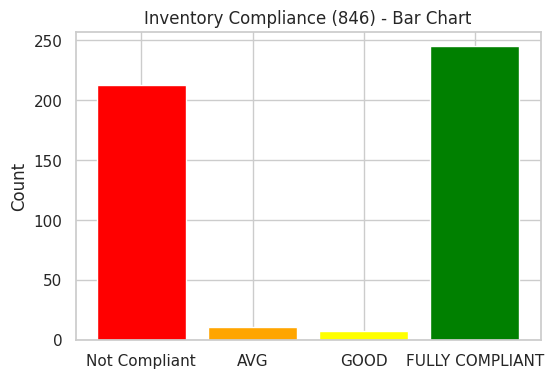

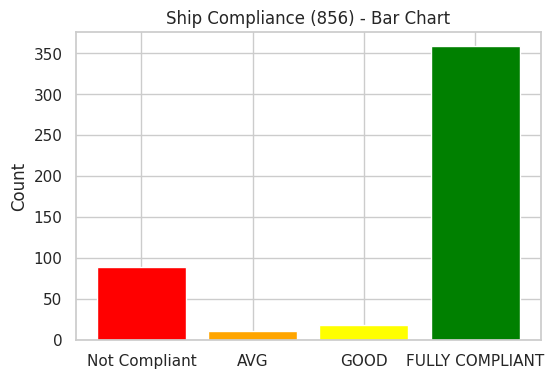

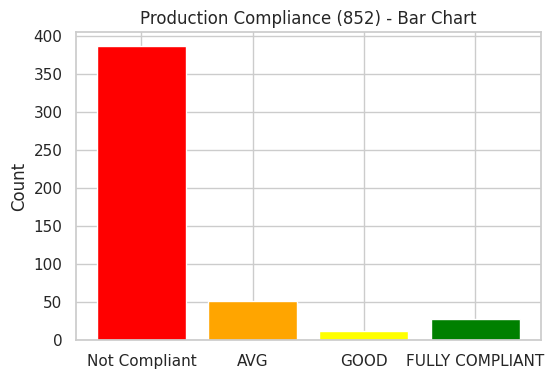

In [47]:
# ---------- Function to plot bar chart ----------
def plot_bar(series, title):
    counts = series.value_counts().reindex(['Not Compliant','AVG','GOOD','FULLY COMPLIANT'], fill_value=0)
    colors = ['red','orange','yellow','green']
    plt.figure(figsize=(6,4))
    plt.bar(counts.index, counts.values, color=colors)
    plt.title(title)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

# ---------- Plot bar charts ----------
plot_bar(df['846_Compliance'], 'Inventory Compliance (846) - Bar Chart')
plot_bar(df['856_Compliance'], 'Ship Compliance (856) - Bar Chart')
plot_bar(df['852_Compliance'], 'Production Compliance (852) - Bar Chart')


# **location-level performance report in Excel.**

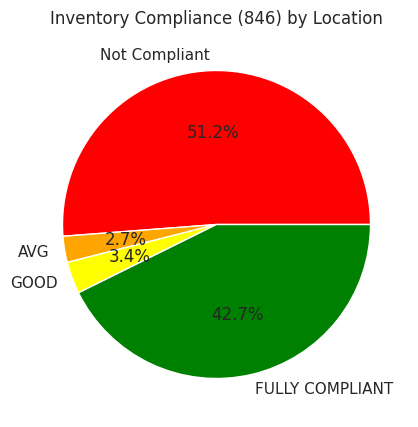

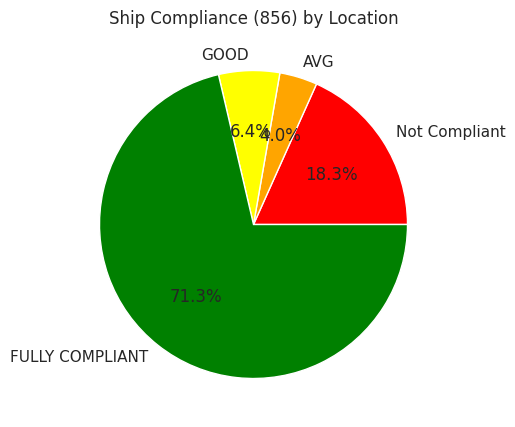

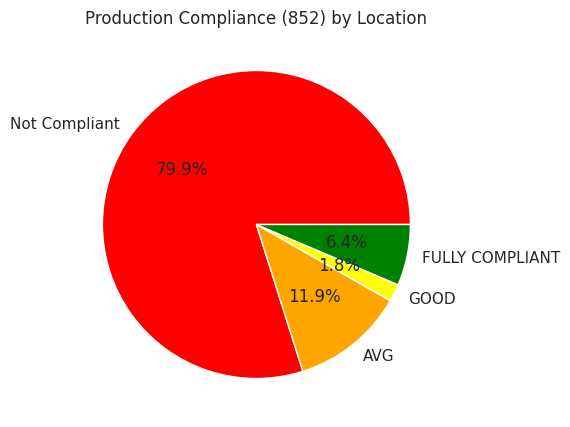

✅ Location-wise compliance report saved to: /content/Location_Wise_Compliance.xlsx


In [51]:
# ================================================================
# 📊 Compliance Visualizations by Location + Export to Excel
# ================================================================
import pandas as pd
import matplotlib.pyplot as plt

# ---------- Load Data ----------
in_path = "/content/Data Received Details.xlsx"
df = pd.read_excel(in_path)
df.columns = df.columns.str.strip()

# ---------- Helper: convert various formats to numeric 0-100 ----------
def to_numeric_percent(x):
    if pd.isna(x):
        return 0.0
    s = str(x).strip().lower()
    if s in ('yes','y','true','t'):
        return 100.0
    if s in ('no','n','false','f'):
        return 0.0
    if '%' in s:
        try:
            return max(0.0, min(100.0, float(s.replace('%','').strip())))
        except:
            return 0.0
    try:
        v = float(s)
        if 0 <= v <= 1:
            return v * 100
        return max(0.0, min(100.0, v))
    except:
        pass
    try:
        pd.to_datetime(s)
        return 100.0
    except:
        return 0.0

# ---------- Columns ----------
col_846 = 'Inventory Data Received (846)'
col_856 = 'Ship Data Received (856)'
col_852_plan = 'Production Plan Data Received (852)'
col_852_act = 'Production Actual Data Received (852)'

# Convert to numeric
df['_846_num'] = df[col_846].apply(to_numeric_percent)
df['_856_num'] = df[col_856].apply(to_numeric_percent)
df['_852_avg'] = (df[col_852_plan].apply(to_numeric_percent) + df[col_852_act].apply(to_numeric_percent))/2

# ---------- Compliance function ----------
def compliance_level(x):
    if x == 0:
        return "Not Compliant"
    elif 0 < x < 75:
        return "AVG"
    elif 75 <= x < 100:
        return "GOOD"
    elif x == 100:
        return "FULLY COMPLIANT"
    else:
        return "Unknown"

# ---------- Aggregate by Location ----------
location_summary = df.groupby('Location').agg({
    '_846_num':'mean',
    '_856_num':'mean',
    '_852_avg':'mean'
}).reset_index()

location_summary['846_Compliance'] = location_summary['_846_num'].apply(compliance_level)
location_summary['856_Compliance'] = location_summary['_856_num'].apply(compliance_level)
location_summary['852_Compliance'] = location_summary['_852_avg'].apply(compliance_level)

# ---------- Function to plot pie chart ----------
def plot_pie(series, title):
    counts = series.value_counts()
    colors = {'Not Compliant':'red','AVG':'orange','GOOD':'yellow','FULLY COMPLIANT':'green'}
    plt.figure(figsize=(5,5))
    plt.pie([counts.get(k,0) for k in ['Not Compliant','AVG','GOOD','FULLY COMPLIANT']],
            labels=['Not Compliant','AVG','GOOD','FULLY COMPLIANT'],
            autopct='%1.1f%%',
            colors=[colors[k] for k in ['Not Compliant','AVG','GOOD','FULLY COMPLIANT']])
    plt.title(title)
    plt.show()

# ---------- Plot pie charts ----------
plot_pie(location_summary['846_Compliance'], 'Inventory Compliance (846) by Location')
plot_pie(location_summary['856_Compliance'], 'Ship Compliance (856) by Location')
plot_pie(location_summary['852_Compliance'], 'Production Compliance (852) by Location')

# ---------- Export to Excel ----------
output_path = "/content/Location_Wise_Compliance.xlsx"
with pd.ExcelWriter(output_path) as writer:
    # Full location summary
    location_summary.to_excel(writer, sheet_name='Location_Summary', index=False)

    # Optional: Separate summary tables per compliance type
    pd.DataFrame(location_summary['846_Compliance'].value_counts()).reset_index().to_excel(writer, sheet_name='846_Summary', index=False)
    pd.DataFrame(location_summary['856_Compliance'].value_counts()).reset_index().to_excel(writer, sheet_name='856_Summary', index=False)
    pd.DataFrame(location_summary['852_Compliance'].value_counts()).reset_index().to_excel(writer, sheet_name='852_Summary', index=False)

print(f"✅ Location-wise compliance report saved to: {output_path}")


# **📊 Category-wise Compliance Bar Charts (Simplified)**

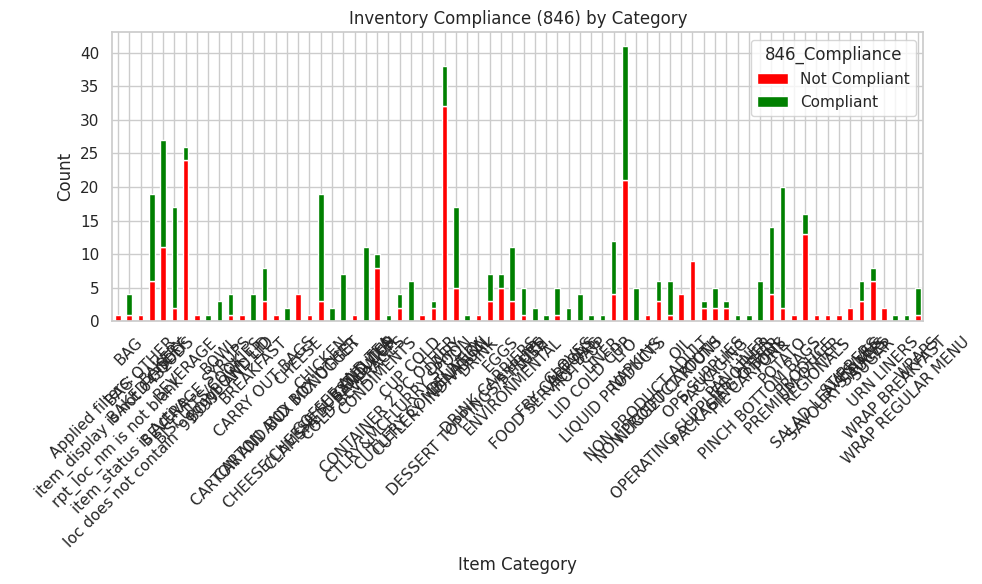

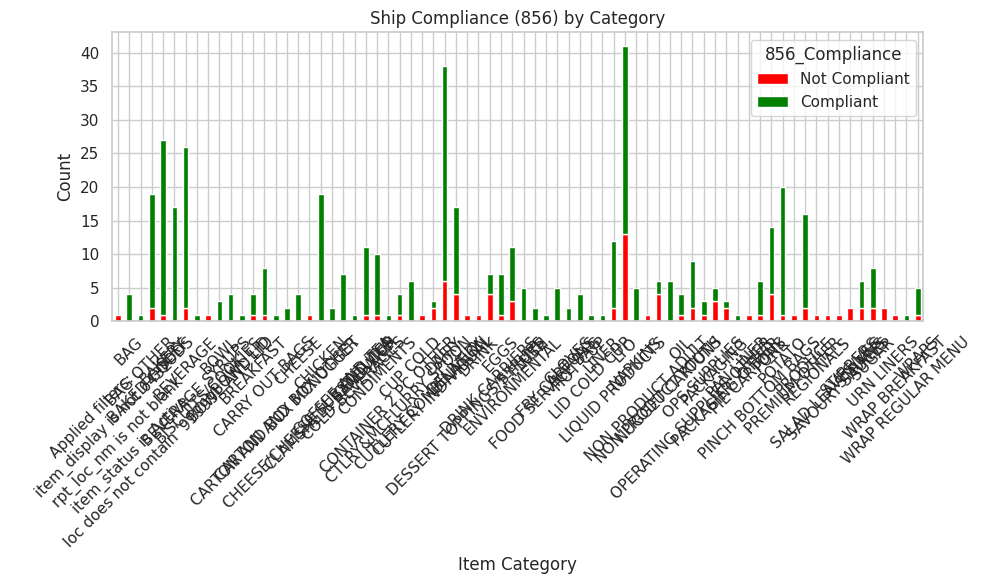

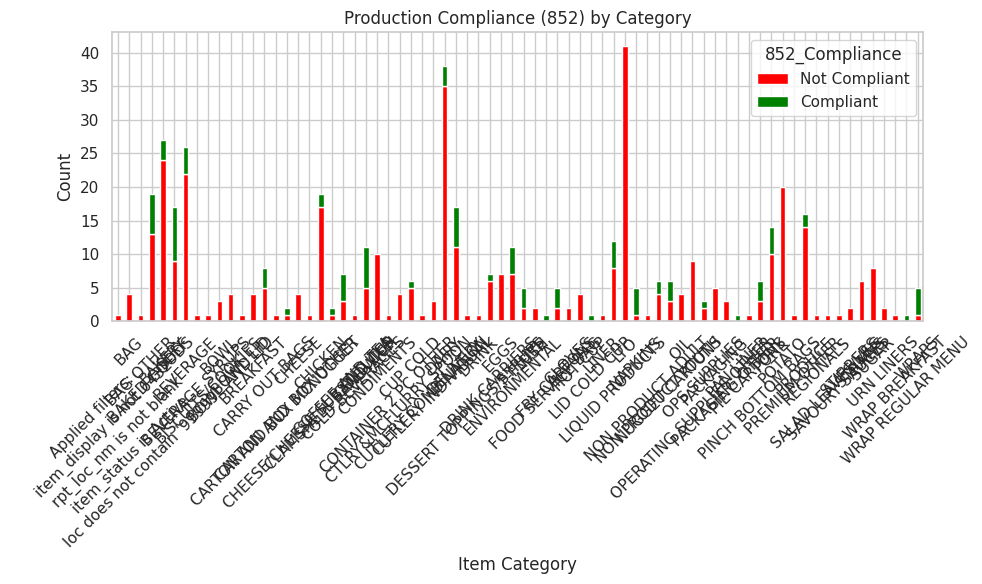

✅ Category-wise compliance report saved to: /content/Category_Wise_Compliance.xlsx


In [53]:
# ================================================================
# 📊 Category-wise Compliance Bar Charts (Simplified)
# ================================================================
import pandas as pd
import matplotlib.pyplot as plt

# ---------- Load Data ----------
in_path = "/content/Data Received Details.xlsx"
df = pd.read_excel(in_path)
df.columns = df.columns.str.strip()

# ---------- Helper: convert to numeric 0-100 ----------
def to_numeric_percent(x):
    if pd.isna(x):
        return 0.0
    s = str(x).strip().lower()
    if s in ('yes','y','true','t'):
        return 100.0
    if s in ('no','n','false','f'):
        return 0.0
    if '%' in s:
        try:
            return max(0.0, min(100.0, float(s.replace('%','').strip())))
        except:
            return 0.0
    try:
        v = float(s)
        if 0 <= v <= 1:
            return v * 100
        return max(0.0, min(100.0, v))
    except:
        pass
    try:
        pd.to_datetime(s)
        return 100.0
    except:
        return 0.0

# ---------- Columns ----------
col_846 = 'Inventory Data Received (846)'
col_856 = 'Ship Data Received (856)'
col_852_plan = 'Production Plan Data Received (852)'
col_852_act = 'Production Actual Data Received (852)'

# Convert to numeric
df['_846_num'] = df[col_846].apply(to_numeric_percent)
df['_856_num'] = df[col_856].apply(to_numeric_percent)
df['_852_avg'] = (df[col_852_plan].apply(to_numeric_percent) + df[col_852_act].apply(to_numeric_percent))/2

# ---------- Simplified Compliance ----------
def simple_compliance(x):
    return "Not Compliant" if x == 0 else "Compliant"

df['846_Compliance'] = df['_846_num'].apply(simple_compliance)
df['856_Compliance'] = df['_856_num'].apply(simple_compliance)
df['852_Compliance'] = df['_852_avg'].apply(simple_compliance)

# ---------- Aggregate by Item Category ----------
def plot_category_bar(df, compliance_col, title):
    summary = df.groupby('Item Category')[compliance_col].value_counts().unstack(fill_value=0)
    summary = summary[['Not Compliant','Compliant']]  # consistent order
    colors = ['red','green']

    # Plot
    summary.plot(kind='bar', stacked=True, color=colors, figsize=(10,6))
    plt.title(title)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return summary  # return summary for Excel export

# ---------- Plot bar charts and collect summaries ----------
summary_846 = plot_category_bar(df, '846_Compliance', 'Inventory Compliance (846) by Category')
summary_856 = plot_category_bar(df, '856_Compliance', 'Ship Compliance (856) by Category')
summary_852 = plot_category_bar(df, '852_Compliance', 'Production Compliance (852) by Category')

# ---------- Export to Excel ----------
output_path = "/content/Category_Wise_Compliance.xlsx"
with pd.ExcelWriter(output_path) as writer:
    summary_846.to_excel(writer, sheet_name='846_Compliance')
    summary_856.to_excel(writer, sheet_name='856_Compliance')
    summary_852.to_excel(writer, sheet_name='852_Compliance')

print(f"✅ Category-wise compliance report saved to: {output_path}")


# **📊 Category-wise Supplier Risk Sheets**

In [61]:
# ================================================================
# 📊 Category-wise Supplier Risk Sheets
# ================================================================
import pandas as pd

# ---------- Load Data ----------
in_path = "/content/Data Received Details.xlsx"
df = pd.read_excel(in_path)
df.columns = df.columns.str.strip()

# ---------- Helper: convert to numeric 0-100 ----------
def to_numeric_percent(x):
    if pd.isna(x):
        return 0.0
    s = str(x).strip().replace('%','').lower()
    if s in ('yes','y','true','t'):
        return 100.0
    if s in ('no','n','false','f'):
        return 0.0
    try:
        v = float(s)
        if 0 <= v <= 1:
            return v * 100
        return max(0.0, min(100.0, v))
    except:
        pass
    try:
        pd.to_datetime(s)
        return 100.0
    except:
        return 0.0

# ---------- Convert relevant columns ----------
cols_numeric = [
    'Inventory Data Received (846)',
    'Ship Data Received (856)',
    'Production Plan Data Received (852)',
    'Production Actual Data Received (852)'
]

for col in cols_numeric:
    df[col + '_num'] = df[col].apply(to_numeric_percent)

# ---------- Risk classification ----------
def risk_level(x):
    if x == 100:
        return "Good"
    elif x == 0:
        return "High Risk"
    elif 25 < x <= 50:
        return "Medium Risk"
    elif 50 < x < 100:
        return "Low Risk"
    else:
        return "Unknown"

# Apply risk classification
df['846_Risk'] = df['Inventory Data Received (846)_num'].apply(risk_level)
df['856_Risk'] = df['Ship Data Received (856)_num'].apply(risk_level)
df['_852_avg'] = (df['Production Plan Data Received (852)_num'] + df['Production Actual Data Received (852)_num'])/2
df['852_Risk'] = df['_852_avg'].apply(risk_level)

# ---------- Create Excel with separate category sheets ----------
output_path = "/content/Category_Wise_Supplier_Risk.xlsx"
with pd.ExcelWriter(output_path) as writer:
    for col, sheet_name in zip(['846_Risk','856_Risk','852_Risk'],
                               ['Inventory 846','Ship 856','Production 852']):
        temp = df[['Item Category','Supplier','Location', col]].copy()
        temp.rename(columns={col:'Risk Level'}, inplace=True)
        temp.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"✅ Category-wise supplier risk report saved to: {output_path}")


✅ Category-wise supplier risk report saved to: /content/Category_Wise_Supplier_Risk.xlsx


## **📊 Supplier-wise Risk Classification Report**

In [56]:
# ================================================================
# 📊 Supplier-wise Risk Classification Report
# ================================================================
import pandas as pd

# ---------- Load Data ----------
in_path = "/content/Data Received Details.xlsx"
df = pd.read_excel(in_path)
df.columns = df.columns.str.strip()

# ---------- Helper: convert to numeric 0-100 ----------
def to_numeric_percent(x):
    if pd.isna(x):
        return 0.0
    s = str(x).strip().replace('%','').lower()
    if s in ('yes','y','true','t'):
        return 100.0
    if s in ('no','n','false','f'):
        return 0.0
    try:
        v = float(s)
        if 0 <= v <= 1:
            return v * 100
        return max(0.0, min(100.0, v))
    except:
        pass
    try:
        pd.to_datetime(s)
        return 100.0
    except:
        return 0.0

# ---------- Convert relevant columns ----------
cols_numeric = [
    'Inventory Data Received (846)',
    'Ship Data Received (856)',
    'Production Plan Data Received (852)',
    'Production Actual Data Received (852)'
]

for col in cols_numeric:
    df[col + '_num'] = df[col].apply(to_numeric_percent)

# ---------- Risk classification ----------
def risk_level(x):
    if x == 100:
        return "Good"
    elif x == 0:
        return "High Risk"
    elif 25 < x <= 50:
        return "Medium Risk"
    elif 50 < x < 100:
        return "Low Risk"
    else:
        return "Unknown"

# Apply to each metric
df['846_Risk'] = df['Inventory Data Received (846)_num'].apply(risk_level)
df['856_Risk'] = df['Ship Data Received (856)_num'].apply(risk_level)
# Average of 852 plan and actual
df['_852_avg'] = (df['Production Plan Data Received (852)_num'] + df['Production Actual Data Received (852)_num'])/2
df['852_Risk'] = df['_852_avg'].apply(risk_level)

# Function to make a safe Excel sheet name
def safe_sheet_name(name):
    # Remove or replace invalid characters
    invalid_chars = ['\\','/',':','*','?','[',']']
    for ch in invalid_chars:
        name = name.replace(ch, '_')
    # Limit length to 31 chars
    return name[:31]

# ---------- Export Supplier-wise sheets ----------
output_path = "/content/Supplier_Wise_Risk_Report.xlsx"
with pd.ExcelWriter(output_path) as writer:
    for supplier, group in df.groupby('Supplier'):
        supplier_df = group[['Item Category', 'Location', '846_Risk', '856_Risk', '852_Risk']]
        supplier_df = supplier_df.drop_duplicates(subset=['Item Category','Location'])
        sheet_name = safe_sheet_name(str(supplier))  # safe sheet name
        supplier_df.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"✅ Supplier-wise risk report saved to: {output_path}")


✅ Supplier-wise risk report saved to: /content/Supplier_Wise_Risk_Report.xlsx


## **📊 Consolidated Risk Report (All Suppliers in One Sheet)**

In [57]:
# ================================================================
# 📊 Consolidated Risk Report (All Suppliers in One Sheet)
# ================================================================
import pandas as pd

# ---------- Load Data ----------
in_path = "/content/Data Received Details.xlsx"
df = pd.read_excel(in_path)
df.columns = df.columns.str.strip()

# ---------- Helper: convert to numeric 0-100 ----------
def to_numeric_percent(x):
    if pd.isna(x):
        return 0.0
    s = str(x).strip().replace('%','').lower()
    if s in ('yes','y','true','t'):
        return 100.0
    if s in ('no','n','false','f'):
        return 0.0
    try:
        v = float(s)
        if 0 <= v <= 1:
            return v * 100
        return max(0.0, min(100.0, v))
    except:
        pass
    try:
        pd.to_datetime(s)
        return 100.0
    except:
        return 0.0

# ---------- Convert relevant columns ----------
cols_numeric = [
    'Inventory Data Received (846)',
    'Ship Data Received (856)',
    'Production Plan Data Received (852)',
    'Production Actual Data Received (852)'
]

for col in cols_numeric:
    df[col + '_num'] = df[col].apply(to_numeric_percent)

# ---------- Risk classification ----------
def risk_level(x):
    if x == 100:
        return "Good"
    elif x == 0:
        return "High Risk"
    elif 25 < x <= 50:
        return "Medium Risk"
    elif 50 < x < 100:
        return "Low Risk"
    else:
        return "Unknown"

# Apply risk classification
df['846_Risk'] = df['Inventory Data Received (846)_num'].apply(risk_level)
df['856_Risk'] = df['Ship Data Received (856)_num'].apply(risk_level)
df['_852_avg'] = (df['Production Plan Data Received (852)_num'] + df['Production Actual Data Received (852)_num'])/2
df['852_Risk'] = df['_852_avg'].apply(risk_level)

# ---------- Prepare consolidated DataFrame ----------
consolidated_df = df[['Item Category', 'Supplier', 'Location', '846_Risk', '856_Risk', '852_Risk']]

# ---------- Count overall risk levels (optional) ----------
risk_counts_846 = consolidated_df['846_Risk'].value_counts().rename_axis('Risk Level').reset_index(name='846_Count')
risk_counts_856 = consolidated_df['856_Risk'].value_counts().rename_axis('Risk Level').reset_index(name='856_Count')
risk_counts_852 = consolidated_df['852_Risk'].value_counts().rename_axis('Risk Level').reset_index(name='852_Count')

# ---------- Export to Excel ----------
output_path = "/content/Consolidated_Risk_Report.xlsx"
with pd.ExcelWriter(output_path) as writer:
    consolidated_df.to_excel(writer, sheet_name='Supplier_Risk_Details', index=False)
    # Optional: add risk level summary
    summary_df = pd.DataFrame({
        'Risk Level': ['Good','Low Risk','Medium Risk','High Risk'],
        '846_Count': [risk_counts_846.set_index('Risk Level').get('846_Count', {}).get(k,0) for k in ['Good','Low Risk','Medium Risk','High Risk']],
        '856_Count': [risk_counts_856.set_index('Risk Level').get('856_Count', {}).get(k,0) for k in ['Good','Low Risk','Medium Risk','High Risk']],
        '852_Count': [risk_counts_852.set_index('Risk Level').get('852_Count', {}).get(k,0) for k in ['Good','Low Risk','Medium Risk','High Risk']],
    })
    summary_df.to_excel(writer, sheet_name='Risk_Summary', index=False)

print(f"✅ Consolidated risk report saved to: {output_path}")


✅ Consolidated risk report saved to: /content/Consolidated_Risk_Report.xlsx


## **📊 Risk Summary Visualization**

Summary counts per risk level:


,846_Risk,856_Risk,852_Risk
Good,245,358,27
Low Risk,10,22,17
Medium Risk,8,6,35
High Risk,213,89,386


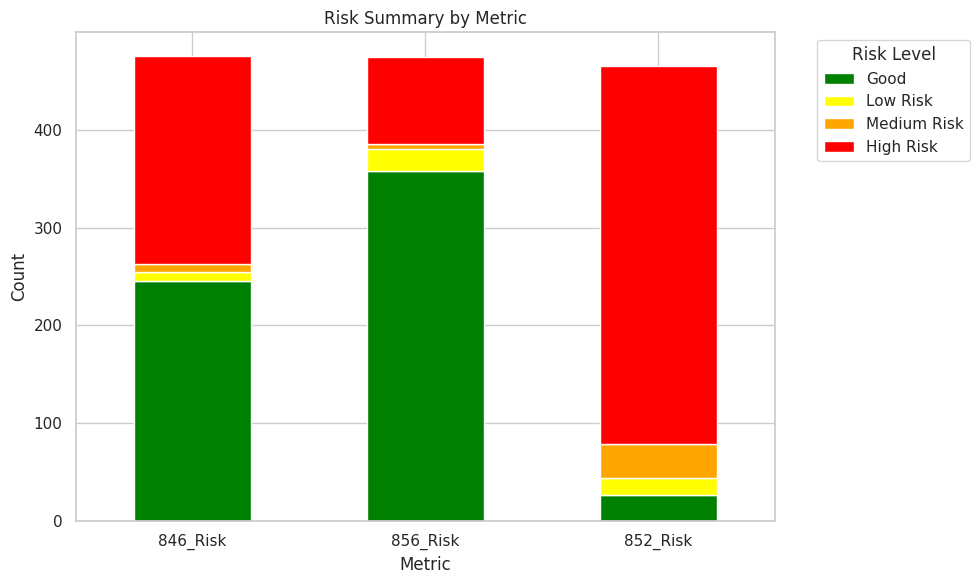

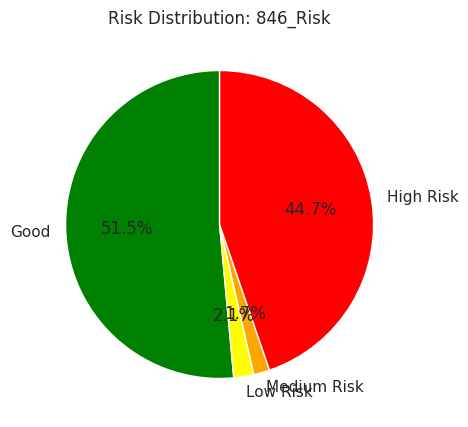

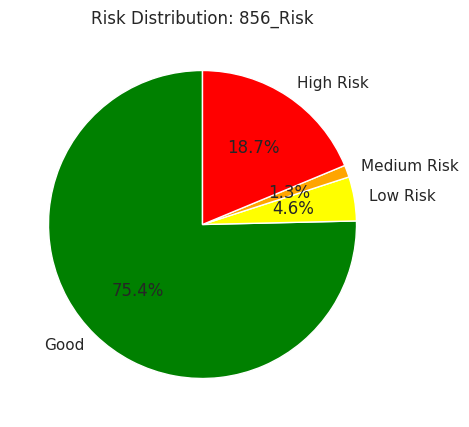

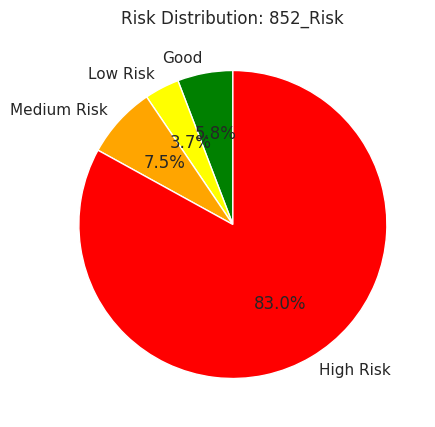

In [58]:
# ================================================================
# 📊 Risk Summary Visualization
# ================================================================
import pandas as pd
import matplotlib.pyplot as plt

# ---------- Load consolidated report ----------
in_path = "/content/Consolidated_Risk_Report.xlsx"
df = pd.read_excel(in_path, sheet_name='Supplier_Risk_Details')

# ---------- Prepare summary counts ----------
metrics = ['846_Risk', '856_Risk', '852_Risk']
risk_levels = ['Good','Low Risk','Medium Risk','High Risk']

summary_dict = {}
for metric in metrics:
    counts = df[metric].value_counts()
    summary_dict[metric] = [counts.get(level,0) for level in risk_levels]

summary_df = pd.DataFrame(summary_dict, index=risk_levels)
print("Summary counts per risk level:")
display(summary_df)

# ---------- Stacked Bar Chart ----------
summary_df.T.plot(kind='bar', stacked=True, color=['green','yellow','orange','red'], figsize=(10,6))
plt.title("Risk Summary by Metric")
plt.ylabel("Count")
plt.xlabel("Metric")
plt.xticks(rotation=0)
plt.legend(title='Risk Level', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# ---------- Optional: Pie Charts per metric ----------
for metric in metrics:
    plt.figure(figsize=(5,5))
    plt.pie([summary_df[metric][level] for level in risk_levels],
            labels=risk_levels,
            colors=['green','yellow','orange','red'],
            autopct='%1.1f%%',
            startangle=90)
    plt.title(f"Risk Distribution: {metric}")
    plt.show()


# **📁 Category-wise Compliance Report (One Excel per Folder, Multi-Sheet)**

In [66]:
# ================================================================
# 📁 Category-wise Compliance Report (One Excel per Folder, Multi-Sheet)
# ================================================================
import pandas as pd
import os
import re

# ---------- Helper to sanitize sheet names ----------
def sanitize_sheet_name(name):
    """Excel sheet names cannot contain: : \ / ? * [ ] and max 31 chars"""
    name = re.sub(r'[:\\/*?\[\]]', '_', str(name))
    return name[:31]

# ---------- Load Data ----------
in_path = "/content/Data Received Details.xlsx"
df = pd.read_excel(in_path)
df.columns = df.columns.str.strip()

# ---------- Helper: convert to numeric 0-100 ----------
def to_numeric_percent(x):
    if pd.isna(x):
        return 0.0
    s = str(x).strip().replace('%','').lower()
    if s in ('yes','y','true','t'):
        return 100.0
    if s in ('no','n','false','f'):
        return 0.0
    try:
        v = float(s)
        if 0 <= v <= 1:
            return v * 100
        return max(0.0, min(100.0, v))
    except:
        pass
    try:
        pd.to_datetime(s)
        return 100.0
    except:
        return 0.0

# ---------- Convert relevant columns ----------
cols_numeric = [
    'Inventory Data Received (846)',
    'Ship Data Received (856)',
    'Production Plan Data Received (852)',
    'Production Actual Data Received (852)'
]

for col in cols_numeric:
    df[col + '_num'] = df[col].apply(to_numeric_percent)

# ---------- Risk classification ----------
def risk_level(x):
    if x == 100:
        return "Good"
    elif x == 0:
        return "High Risk"
    elif 25 < x <= 50:
        return "Medium Risk"
    elif 50 < x < 100:
        return "Low Risk"
    else:
        return "Unknown"

df['846_Risk'] = df['Inventory Data Received (846)_num'].apply(risk_level)
df['856_Risk'] = df['Ship Data Received (856)_num'].apply(risk_level)
df['_852_avg'] = (df['Production Plan Data Received (852)_num'] + df['Production Actual Data Received (852)_num'])/2
df['852_Risk'] = df['_852_avg'].apply(risk_level)

# ---------- Prepare folders ----------
base_path = "/content"
folders = {
    '846_Risk': os.path.join(base_path, 'Category_Wise_Compliance_846'),
    '852_Risk': os.path.join(base_path, 'Category_Wise_Compliance_852'),
    '856_Risk': os.path.join(base_path, 'Category_Wise_Compliance_856')
}

for path in folders.values():
    os.makedirs(path, exist_ok=True)

# ---------- Risk levels ----------
risk_levels = ['Good','Low Risk','Medium Risk','High Risk']
metrics = {'846_Risk': 'Inventory 846', '852_Risk': 'Production 852', '856_Risk': 'Ship 856'}

# ---------- Generate Excel per folder ----------
for metric, metric_name in metrics.items():
    folder_path = folders[metric]
    file_path = os.path.join(folder_path, f"{metric_name.replace(' ','_')}_Category_Report.xlsx")

    categories = df['Item Category'].unique()

    with pd.ExcelWriter(file_path) as writer:
        # ----- One sheet per category -----
        for category in categories:
            category_df = df[df['Item Category'] == category][['Supplier','Location', metric]].copy()
            category_df.rename(columns={metric:'Risk Level'}, inplace=True)
            sheet_name = sanitize_sheet_name(category)
            category_df.to_excel(writer, sheet_name=sheet_name, index=False)

        # ----- Summary sheet -----
        summary_list = []
        for category in categories:
            temp = df[df['Item Category'] == category]
            counts = temp[metric].value_counts()
            summary_list.append({
                'Item Category': category,
                **{level: counts.get(level,0) for level in risk_levels}
            })
        summary_df = pd.DataFrame(summary_list)
        summary_df.to_excel(writer, sheet_name='Summary', index=False)

print("✅ Category-wise compliance Excel reports created in folders:")
for f, path in folders.items():
    print(f"{f}: {path}")


<>:10: SyntaxWarning:

invalid escape sequence '\ '

<>:10: SyntaxWarning:

invalid escape sequence '\ '

/tmp/ipython-input-2384075965.py:10: SyntaxWarning:

invalid escape sequence '\ '



✅ Category-wise compliance Excel reports created in folders:
846_Risk: /content/Category_Wise_Compliance_846
852_Risk: /content/Category_Wise_Compliance_852
856_Risk: /content/Category_Wise_Compliance_856


In [71]:
import shutil
import os

# List of folders to delete
folders_to_delete = [ "/content/Supplier_Wise_Risk_Report" ]

for folder in folders_to_delete:
    if os.path.exists(folder):
        shutil.rmtree(folder)  # deletes folder and all its contents
        print(f"✅ Deleted folder: {folder}")
    else:
        print(f"⚠️ Folder not found: {folder}")


✅ Deleted folder: /content/Supplier_Wise_Risk_Report


In [72]:
# ================================================================
# 📄 Single Excel for All Suppliers with Risk Levels
# ================================================================
import pandas as pd
import os

# ---------- Load Data ----------
in_path = "/content/Data Received Details.xlsx"
df = pd.read_excel(in_path)
df.columns = df.columns.str.strip()

# ---------- Convert relevant columns to numeric 0-100 ----------
def to_numeric_percent(x):
    if pd.isna(x):
        return 0.0
    s = str(x).strip().replace('%','').lower()
    if s in ('yes','y','true','t'):
        return 100.0
    if s in ('no','n','false','f'):
        return 0.0
    try:
        v = float(s)
        if 0 <= v <= 1:
            return v * 100
        return max(0.0, min(100.0, v))
    except:
        pass
    try:
        pd.to_datetime(s)
        return 100.0
    except:
        return 0.0

df['846_num'] = df['Inventory Data Received (846)'].apply(to_numeric_percent)
df['856_num'] = df['Ship Data Received (856)'].apply(to_numeric_percent)
df['852_avg'] = (df['Production Plan Data Received (852)'].apply(to_numeric_percent) +
                 df['Production Actual Data Received (852)'].apply(to_numeric_percent)) / 2

# ---------- Risk classification ----------
def risk_level(x):
    if x == 100:
        return "Good"
    elif x == 0:
        return "High Risk"
    elif 25 < x <= 50:
        return "Medium Risk"
    elif 50 < x < 100:
        return "Low Risk"
    else:
        return "Unknown"

df['846_Risk'] = df['846_num'].apply(risk_level)
df['852_Risk'] = df['852_avg'].apply(risk_level)
df['856_Risk'] = df['856_num'].apply(risk_level)

# ---------- Compute Overall Risk ----------
def overall_risk(row):
    risks = [row['846_Risk'], row['852_Risk'], row['856_Risk']]
    if "High Risk" in risks:
        return "High Risk"
    elif "Medium Risk" in risks:
        return "Medium Risk"
    elif "Low Risk" in risks:
        return "Low Risk"
    else:
        return "Good"

df['Overall_Risk'] = df.apply(overall_risk, axis=1)

# ---------- Prepare folder ----------
folder_path = "/content/Supplier_Wise_Risk_Report"
os.makedirs(folder_path, exist_ok=True)

# ---------- Save all suppliers in one Excel ----------
output_file = os.path.join(folder_path, "All_Suppliers_Risk_Report.xlsx")
final_cols = ['Item Category','Supplier','Location','846_Risk','852_Risk','856_Risk','Overall_Risk']
df[final_cols].to_excel(output_file, index=False)

print(f"✅ All suppliers risk report saved in: {output_file}")


✅ All suppliers risk report saved in: /content/Supplier_Wise_Risk_Report/All_Suppliers_Risk_Report.xlsx


In [73]:
# ================================================================
# 📄 Supplier-wise Risk Report (Without 856)
# ================================================================
import pandas as pd
import os

# ---------- Load Data ----------
in_path = "/content/Data Received Details.xlsx"
df = pd.read_excel(in_path)
df.columns = df.columns.str.strip()

# ---------- Convert relevant columns to numeric 0-100 ----------
def to_numeric_percent(x):
    if pd.isna(x):
        return 0.0
    s = str(x).strip().replace('%','').lower()
    if s in ('yes','y','true','t'):
        return 100.0
    if s in ('no','n','false','f'):
        return 0.0
    try:
        v = float(s)
        if 0 <= v <= 1:
            return v * 100
        return max(0.0, min(100.0, v))
    except:
        pass
    try:
        pd.to_datetime(s)
        return 100.0
    except:
        return 0.0

df['846_num'] = df['Inventory Data Received (846)'].apply(to_numeric_percent)
df['852_avg'] = (df['Production Plan Data Received (852)'].apply(to_numeric_percent) +
                 df['Production Actual Data Received (852)'].apply(to_numeric_percent)) / 2

# ---------- Risk classification ----------
def risk_level(x):
    if x == 100:
        return "Good"
    elif x == 0:
        return "High Risk"
    elif 25 < x <= 50:
        return "Medium Risk"
    elif 50 < x < 100:
        return "Low Risk"
    else:
        return "Unknown"

df['846_Risk'] = df['846_num'].apply(risk_level)
df['852_Risk'] = df['852_avg'].apply(risk_level)

# ---------- Compute Overall Risk (based on 846 and 852) ----------
def overall_risk(row):
    risks = [row['846_Risk'], row['852_Risk']]
    if "High Risk" in risks:
        return "High Risk"
    elif "Medium Risk" in risks:
        return "Medium Risk"
    elif "Low Risk" in risks:
        return "Low Risk"
    else:
        return "Good"

df['Overall_Risk'] = df.apply(overall_risk, axis=1)

# ---------- Prepare folder ----------
folder_path = "/content/Supplier_Wise_Risk_Report_846_852"
os.makedirs(folder_path, exist_ok=True)

# ---------- Save all suppliers in one Excel ----------
output_file = os.path.join(folder_path, "All_Suppliers_Risk_Report_846_852.xlsx")
final_cols = ['Item Category','Supplier','Location','846_Risk','852_Risk','Overall_Risk']
df[final_cols].to_excel(output_file, index=False)

print(f"✅ Supplier-wise risk report (without 856) saved in: {output_file}")


✅ Supplier-wise risk report (without 856) saved in: /content/Supplier_Wise_Risk_Report_846_852/All_Suppliers_Risk_Report_846_852.xlsx


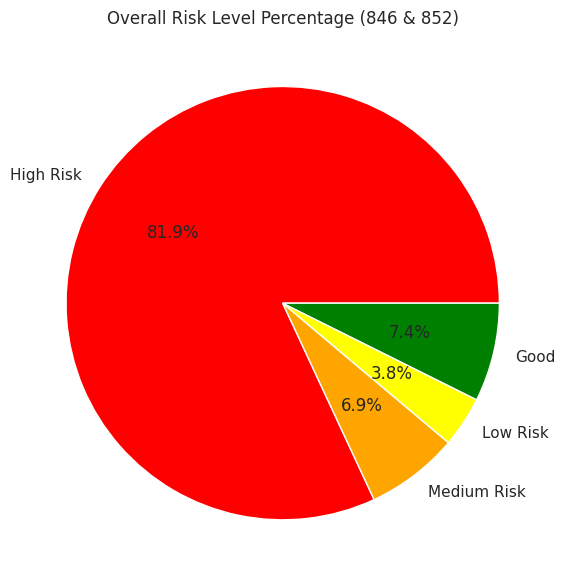

✅ Pie chart saved in: /content/Supplier_Wise_Risk_Report_846_852/Overall_Risk_Level_Pie_Chart.png


In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# ---------- Load the report ----------
folder_path = "/content/Supplier_Wise_Risk_Report_846_852"
file_path = os.path.join(folder_path, "All_Suppliers_Risk_Report_846_852.xlsx")
df = pd.read_excel(file_path)

# ---------- Compute Overall Risk counts ----------
risk_counts = df['Overall_Risk'].value_counts()
risk_percentages = (risk_counts / risk_counts.sum()) * 100

# ---------- Plot Pie Chart ----------
colors = {
    'High Risk': 'red',
    'Medium Risk': 'orange',
    'Low Risk': 'yellow',
    'Good': 'green'
}

plt.figure(figsize=(6,6))
plt.pie(
    [risk_percentages.get(k, 0) for k in ['High Risk','Medium Risk','Low Risk','Good']],
    labels=['High Risk','Medium Risk','Low Risk','Good'],
    autopct='%1.1f%%',
    colors=[colors[k] for k in ['High Risk','Medium Risk','Low Risk','Good']]
)
plt.title("Overall Risk Level Percentage (846 & 852)")
plt.tight_layout()

# ---------- Save pie chart ----------
pie_path = os.path.join(folder_path, "Overall_Risk_Level_Pie_Chart.png")
plt.savefig(pie_path)
plt.show()

print(f"✅ Pie chart saved in: {pie_path}")


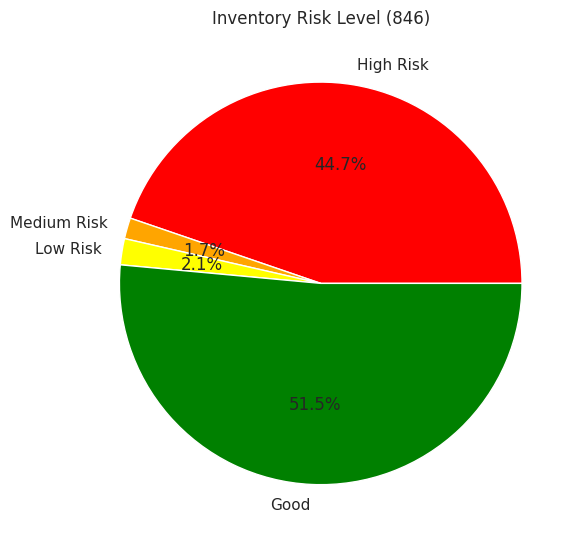

✅ Pie chart saved: /content/Supplier_Wise_Risk_Report_846_852/Inventory_Risk_846_Pie.png


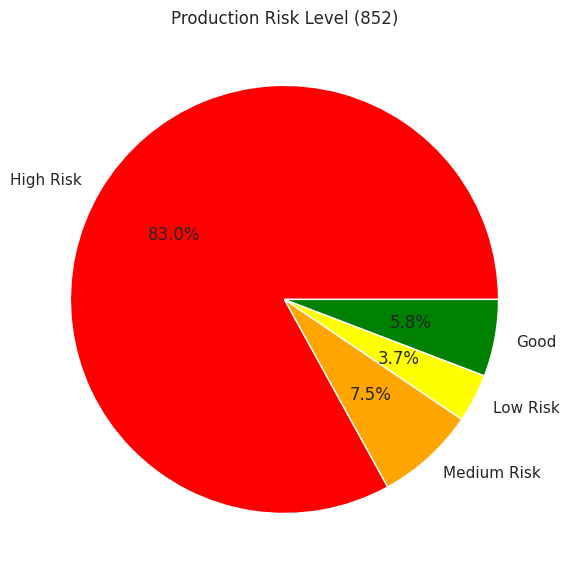

✅ Pie chart saved: /content/Supplier_Wise_Risk_Report_846_852/Production_Risk_852_Pie.png


In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# ---------- Load the report ----------
folder_path = "/content/Supplier_Wise_Risk_Report_846_852"
file_path = os.path.join(folder_path, "All_Suppliers_Risk_Report_846_852.xlsx")
df = pd.read_excel(file_path)

# ---------- Define colors ----------
colors = {
    'High Risk': 'red',
    'Medium Risk': 'orange',
    'Low Risk': 'yellow',
    'Good': 'green'
}

# ---------- Function to plot and save pie chart ----------
def plot_risk_pie(df, column, title, save_path):
    counts = df[column].value_counts()
    percentages = (counts / counts.sum()) * 100

    plt.figure(figsize=(6,6))
    plt.pie(
        [percentages.get(k, 0) for k in ['High Risk','Medium Risk','Low Risk','Good']],
        labels=['High Risk','Medium Risk','Low Risk','Good'],
        autopct='%1.1f%%',
        colors=[colors[k] for k in ['High Risk','Medium Risk','Low Risk','Good']]
    )
    plt.title(title)
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()
    print(f"✅ Pie chart saved: {save_path}")

# ---------- Plot 846 Risk Pie ----------
plot_risk_pie(
    df,
    column='846_Risk',
    title='Inventory Risk Level (846)',
    save_path=os.path.join(folder_path, "Inventory_Risk_846_Pie.png")
)

# ---------- Plot 852 Risk Pie ----------
plot_risk_pie(
    df,
    column='852_Risk',
    title='Production Risk Level (852)',
    save_path=os.path.join(folder_path, "Production_Risk_852_Pie.png")
)
